In [1]:
import arviz as az
import pymc3 as pm

from data import dataloader
from models.pymc3_models import Model

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
df = dataloader.get_zpeg(1)
sne_data = df[["mag", "redshift", "stretch", "color", "host_mass"]]

model = Model(
    sne_data, hubble_constant=70, omega_m=0.3, host_mass_correction_model="step"
)

model

In [3]:
with model:
    trace = pm.sample(20000, chains=4, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [size, loc, M, $\beta$, $\alpha$, $\sigma_{HR}$]


Sampling 4 chains for 1_000 tune and 20_000 draw iterations (4_000 + 80_000 draws total) took 904 seconds.
There were 19942 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.5423152013212315, but should be close to 0.8. Try to increase the number of tuning steps.
There were 17257 divergences after tuning. Increase `target_accept` or reparameterize.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
There were 19993 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.438128369466146, but should be close to 0.8. Try to increase the number of tuning steps.
There were 19962 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.24319492663161163, but should be close to 0.8. Try to increase the numbe

/home/keto/.pyenv/versions/3.8.6/lib/python3.8/site-packages/arviz/data/io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'M\n0'}>,
        <AxesSubplot:title={'center':'M\n0'}>],
       [<AxesSubplot:title={'center':'loc\n0'}>,
        <AxesSubplot:title={'center':'loc\n0'}>],
       [<AxesSubplot:title={'center':'size\n0'}>,
        <AxesSubplot:title={'center':'size\n0'}>]], dtype=object)

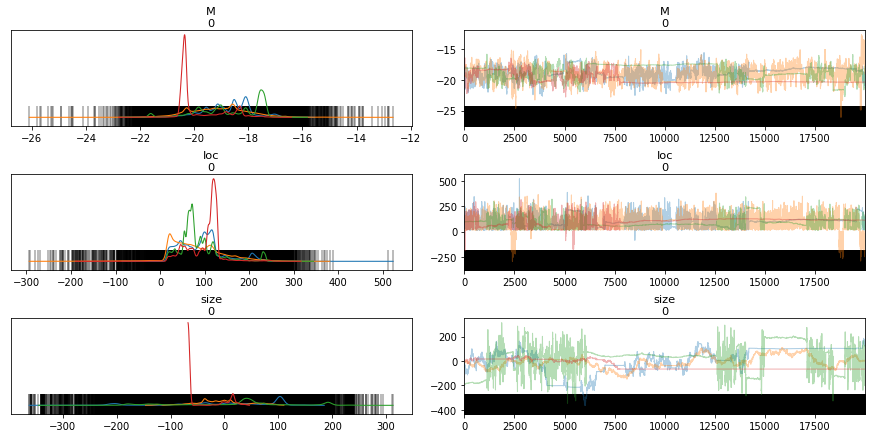

In [4]:
az.plot_trace(trace, var_names=['M', 'loc', 'size'])

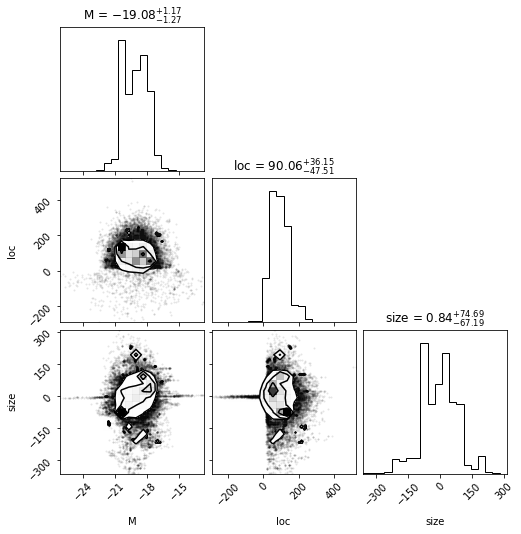

In [5]:
from corner import corner
import numpy as np 

labels = ['M', 'loc', 'size']
corner(np.vstack([trace[k].flatten() for k in labels]).T, labels=labels, show_titles=True);